<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# ARIMA Lab

_Authors: Joseph Nelson (DC)_

---

## Introduction

> ***Note:*** _This can be a pair programming activity or done independently._

The most common application for AR, ARMA, and ARIMA models is inventory planning. Planning inventory for a small shop can be difficult enough, but you've just been hired to plan inventory for a _big_ store - Walmart

In this lab, you will be analyzing weekly Walmart sales data over a two year period from 2010 to 2012. The data is separated by store and by department, but you should focus on analyzing one store for simplicity. Your supervisor has set out the following goals for this project:

1. Record any observed trends in the data.
1. Produce a trained model to predict future sales numbers.
1. Include useful AND COMMENT ON how graphs (ACF, PACF) impact your modelling decisions throughout your notebook.

Try your best to tune your model. It can be difficult, but don't worry - timeseries analysis is just a difficult and specialized topic.

## Exercise
---

#### Requirements

- Assemble observations and graphs as well as timeseries models in a notebook.


#### Additional Resources

1. [ARMA Example](https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html)
2. [ARMA Models for TSA](https://www.quantstart.com/articles/Autoregressive-Moving-Average-ARMA-p-q-Models-for-Time-Series-Analysis-Part-1)

First, we need to setup our prerequisite DataFrame that will be used through the rest of the lab.

In [83]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

data = pd.read_csv('./datasets/train.csv')
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


#### 1. Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [72]:
data.reset_index(inplace= True)

data['Date']= pd.to_datetime(data['Date'])

data.set_index('Date',inplace = True)

In [73]:
data = data[data['Store'] == 1]

In [78]:
weekly = data['Weekly_Sales'].resample('W').sum()

#### 2. Plot the rolling_mean for Weekly_Sales. What general trends do you observe?

In [80]:
import matplotlib.pyplot as plt

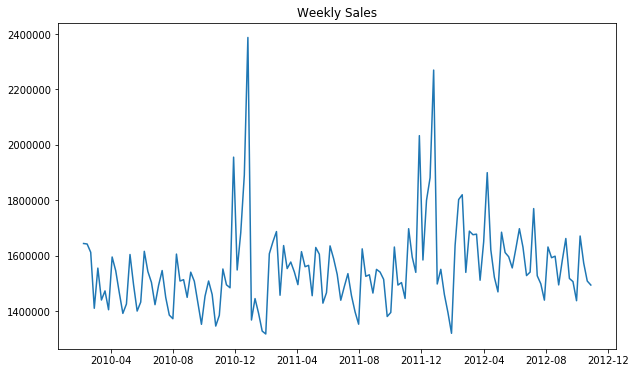

In [82]:
plt.figure(figsize = (10,6))
plt.plot(weekly)
plt.title(s='Weekly Sales')
plt.show();

Unsurprisingly we find huge spikes in sales toward the holidays.

#### 3. Compute the 1, 2, 52 autocorrelations for Weekly_Sales and create an autocorrelation and partial autocorrelation plot.

In [105]:
weekly = pd.DataFrame(weekly)

In [109]:
weekly['rolling1'] = weekly['Weekly_Sales'].rolling(1).sum()
weekly['rolling2'] = weekly['Weekly_Sales'].rolling(2).sum()
weekly['rolling52'] = weekly['Weekly_Sales'].rolling(52).sum()

weekly.corr()

,Weekly_Sales,rolling1,rolling2,rolling52
Weekly_Sales,1.000000,1.000000,0.806768,0.109563
rolling1,1.000000,1.000000,0.806768,0.109563
rolling2,0.806768,0.806768,1.000000,0.163776
rolling52,0.109563,0.109563,0.163776,1.000000


C:\Users\tbaca\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


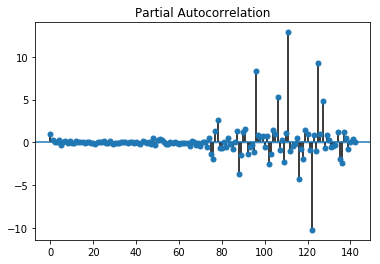

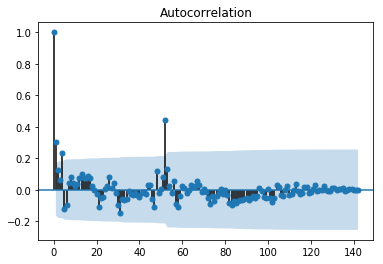

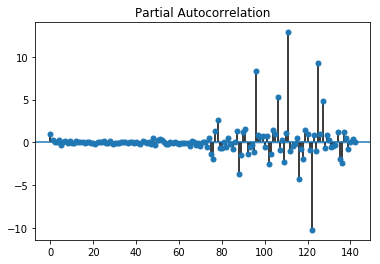

In [111]:
plot_acf(weekly['rolling1'])
plot_pacf(weekly['rolling1'])

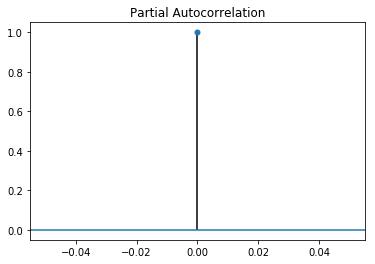

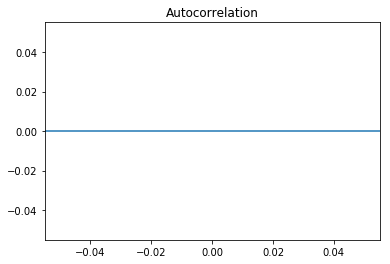

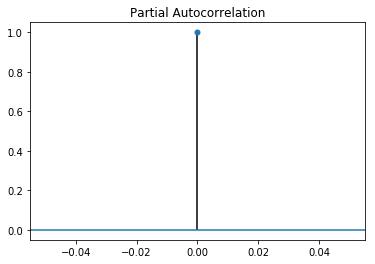

In [112]:
plot_acf(weekly['rolling2'])
plot_pacf(weekly['rolling2'])

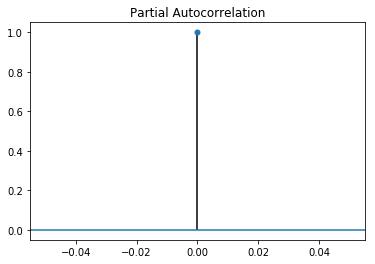

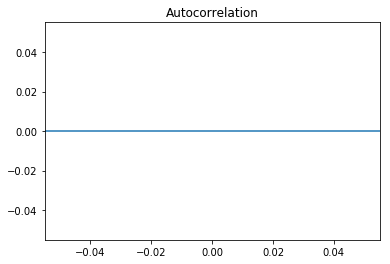

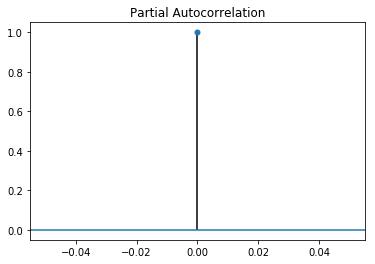

In [113]:
plot_acf(weekly['rolling52'])
plot_pacf(weekly['rolling52'])

##### 4. [BONUS]: What do the acf() and pacf() plots say about the type of model you want to build?

#### 5. Split the weekly sales data in a training and test set - using the first 75% of the data for training.

In [147]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(weekly.index, weekly['Weekly_Sales'],test_size = .25, train_size = .75)

#### 6. "Difference" the data by converting the sales into change in sales (diff function is convenient for doing this.)

In [149]:
X_train

DatetimeIndex(['2010-07-18', '2012-01-08', '2011-09-04', '2011-03-27',
               '2012-02-12', '2012-10-14', '2011-12-25', '2012-07-22',
               '2010-02-14', '2011-05-08',
               ...
               '2012-02-19', '2010-09-12', '2012-02-26', '2010-12-12',
               '2010-09-19', '2011-04-24', '2012-07-15', '2012-09-09',
               '2010-05-16', '2011-01-09'],
              dtype='datetime64[ns]', name='Date', length=107, freq=None)

In [119]:
diff = weekly['Weekly_Sales'].diff()

#### 7. Create an AR(1) model on the training data and compute the mean absolute error of the predictions. How effective is this model?

In [150]:
from statsmodels.tsa.arima_model import ARMA, ARIMA
ar1 = ARMA(endog = y_train, order = (1,0))

C:\Users\tbaca\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [151]:
model= ar1.fit()

preds = model.predict()

In [153]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_train)

99830.306910543

#### 8. Plot the residuals - where are their significant errors?

In [ ]:
##I don't know about how to do this? -will ask tomorrow-

#### 9. Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set?

In [154]:
ar2 = ARMA(endog = y_train, order = (2,0))
model= ar2.fit()
preds = model.predict()
mean_absolute_error(preds, y_train)

C:\Users\tbaca\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


99885.26887789633

In [155]:
ar22 = ARMA(endog = y_train, order = (2,2))
model= ar22.fit()
preds = model.predict()
mean_absolute_error(preds, y_train)

C:\Users\tbaca\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


98725.2792374342

#### 10. Assemble your findings, including any useful graphs.

In [ ]:
##????? not sure what to graph here